In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from scipy.fftpack import rfft, fft

In [2]:
fs = 10
N = 10000
t = np.linspace(0, N/fs, N, endpoint=False)
R = 50

In [3]:
f = 1
a = 1
dc = 0
signal = a*np.sin(2*np.pi*f*t/fs) + dc
signal_vrms = np.sqrt(1/(N)*np.sum(np.square(signal)))
signal_avg_power = np.square(signal_vrms)

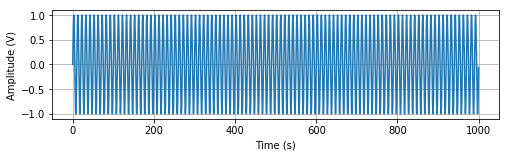

Vrms = 0.7071067811865476
Power (W|50hm) = 0.010000000000000002
Power (dBm) = 10.0


In [4]:
plt.figure(figsize=(8, 2))
plt.plot(t,signal)
plt.ylabel('Amplitude (V)')
plt.xlabel('Time (s)')
plt.grid()
plt.show()
print("Vrms =", signal_vrms)
print("Power (W|50hm) =", signal_avg_power/R)
print("Power (dBm) =", 10*np.log10(signal_avg_power/R)+30)

In [5]:
fft_x = np.linspace(0, fs/(2.0), N//2, endpoint=False)
fft_y = fft(signal)
fft_mag  = np.append(np.abs(fft_y[0]),np.abs(fft_y[1:N//2])*2)/N
fft_power = np.square(fft_mag)
fft_power_watt= fft_power/(2*R)
fft_power_dbm = 10*np.log10(fft_power/(2*R))+30

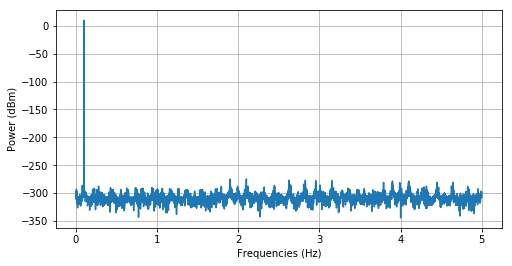

RBW = 0.001
FFT Gain (dB) = -36.98970004336019
Power (W|50ohm) = 0.01
Power (dBm) = 10.0


In [6]:
plt.figure(figsize=(8,4))
plt.plot(fft_x, fft_power_dbm)
plt.ylabel('Power (dBm)')
plt.xlabel('Frequencies (Hz)')
plt.grid()
plt.show()
print("RBW =", fs/N)
print("FFT Gain (dB) =", -10*np.log10(N/2))
# Vrms/sqrt(2)=Vpeak for sine Vrms^2=Vpeak^2/2
print("Power (W|50ohm) =", np.sum(fft_power/(2*R)))
print("Power (dBm) =", 10*np.log10(np.sum(fft_power/(2*R)))+30)

In [7]:
SNR_dB = 0

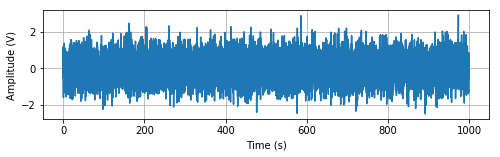

Scaling = 0.7107567111367946
Mean = -0.005008362769596888
Std Dev = 0.7070890441113964
Vrms = 0.7071067811865476
Power (W) = 0.010000000000000002
Power (dBm) = 10.0


In [8]:
noise = np.random.normal(0,1,N)
noise_vrms = np.sqrt(1/(N)*np.sum(np.square(noise)))
noise_avg_power = np.square(noise_vrms)
k = np.sqrt((signal_avg_power/noise_avg_power)*10**(-SNR_dB/10))
noise = k*noise
noise_vrms = np.sqrt(1/(N)*np.sum(np.square(noise)))
noise_avg_power = np.square(noise_vrms)

plt.figure(figsize=(8,2))
plt.plot(t,noise)
plt.ylabel('Amplitude (V)')
plt.xlabel('Time (s)')
plt.grid()
plt.show()
print("Scaling =", k)
print("Mean =", np.mean(noise))
print("Std Dev =", np.std(noise))
print("Vrms =", noise_vrms)
print("Power (W) =", noise_avg_power/R)
print("Power (dBm) =", 10*np.log10(noise_avg_power/R)+30)

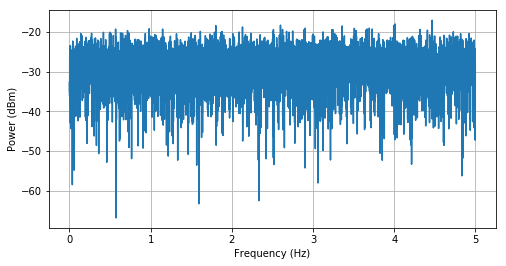

Power (W|50ohm) = 0.009998128084257384
Power (dBm) = 9.999186961223018
FFT Gain (dB) = -36.98970004336019
RBW (dB) = 40.0
FFT Mean (dBm) = -26.99051308213717


In [9]:
fft_y = fft(noise)
fft_mag  = np.append(np.abs(fft_y[0])/N,np.abs(fft_y[1:N//2])*2/N)
fft_power = np.square(fft_mag)
fft_power_watt= fft_power/(2*R)
fft_power_dbm = 10*np.log10(fft_power_watt)+30

plt.figure(figsize=(8,4))
plt.plot(fft_x, fft_power_dbm)
plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.show()

# Vrms/sqrt(2)=Vpeak for sine Vrms^2=Vpeak^2/2
print("Power (W|50ohm) =", np.sum(fft_power/(2*R)))
print("Power (dBm) =", 10*np.log10(np.sum(fft_power/(2*R))) + 30)
print("FFT Gain (dB) =", -10*np.log10(N/2))
print("RBW (dB) =", 10*np.log10(N))
print("FFT Mean (dBm) =", 10*np.log10(np.sum(fft_power/(2*R))) + 30  - 10*np.log10(N/2))

In [10]:
fft_y = rfft(signal+noise)
fft_mag  = np.append(np.abs(fft_y[0])/N,np.abs(fft_y[1:N//2])*2/N)
fft_power = np.square(fft_mag)
fft_power_watt= fft_power/(2*R)
fft_power_dbm = 10*np.log10(fft_power_watt)+30

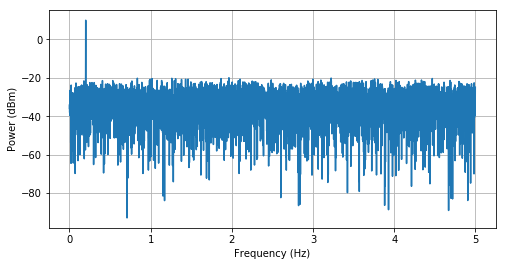

In [11]:
plt.figure(figsize=(8,4))
plt.plot(fft_x, fft_power_dbm)
plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.show()